In [2]:
# import required libraries
import pandas as pd
import numpy as np

In [3]:
# import NYC population data 
NYC_pop_data = pd.read_csv('https://data.cityofnewyork.us/resource/xywu-7bv9.csv')

In [4]:
# display the NYC population dataframe
NYC_pop_data

age_group           borough    _1950  _1950_boro_share_of_nyc_total  \
0  Total Population         NYC Total  7891957                         100.00   
1  Total Population             Bronx  1451277                          18.39   
2  Total Population          Brooklyn  2738175                          34.70   
3  Total Population         Manhattan  1960101                          24.84   
4  Total Population            Queens  1550849                          19.65   
5  Total Population     Staten Island   191555                           2.43   

     _1960  _1960_boro_share_of_nyc_total    _1970  \
0  7781984                         100.00  7894862   
1  1424815                          18.31  1471701   
2  2627319                          33.76  2602012   
3  1698281                          21.82  1539233   
4  1809578                          23.25  1986473   
5   221991                           2.85   295443   

   _1970_boro_share_of_nyc_total    _1980  _1980_boro_share_of_nyc_total  ...  \
0                         100.00  7071639                         100.00  ...   
1                          18.64  1168972                          16.53  ...   
2                          32.96  2230936                          31.55  ...   
3                          19.50  1428285                          20.20  ...   
4                          25.16  1891325                          26.75  ...   
5                           3.74   352121                           4.98  ...   

     _2000  _2000_boro_share_of_nyc_total    _2010  \
0  8008278                         100.00  8242624   
1  1332650                          16.64  1385108   
2  2465326                          30.78  2552911   
3  1537195                          19.20  1585873   
4  2229379                          27.84  2250002   
5   443728                           5.54   468730   

   _2010_boro_share_of_nyc_total    _2020  _2020_boro_share_of_nyc_total  \
0                         100.00  8550971                         100.00   
1                          16.80  1446788                          16.92   
2                          30.97  2648452                          30.97   
3                          19.24  1638281                          19.16   
4                          27.30  2330295                          27.25   
5                           5.69   487155                           5.70   

     _2030  _2030_boro_share_of_nyc_total    _2040  \
0  8821027                         100.00  9025145   
1  1518998                          17.22  1579245   
2  2754009                          31.22  2840525   
3  1676720                          19.01  1691617   
4  2373551                          26.91  2412649   
5   497749                           5.64   501109   

   _2040_boro_share_of_nyc_total  
0                         100.00  
1                          17.50  
2                          31.47  
3                          18.74  
4                          26.73  
5                           5.55  

[6 rows x 22 columns]

In [5]:
# extract features required and store in separate dataframes
pop_data2020 = NYC_pop_data[['borough', '_2020', '_2020_boro_share_of_nyc_total']]
pop_data2040 = NYC_pop_data[['borough', '_2040', '_2040_boro_share_of_nyc_total']]

In [6]:
# Rename columns for 2020 population data and convert in to millions
pop_data2020.rename(columns={'borough':'Borough', '_2020':'Population 2020 (in millions)', '_2020_boro_share_of_nyc_total':'2020 Population Percentage'}, inplace=True)
pop_data2020['Population 2020 (in millions)'] = pop_data2020['Population 2020 (in millions)']/1000000
pop_data2020

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Borough  Population 2020 (in millions)  2020 Population Percentage
0         NYC Total                       8.550971                      100.00
1             Bronx                       1.446788                       16.92
2          Brooklyn                       2.648452                       30.97
3         Manhattan                       1.638281                       19.16
4            Queens                       2.330295                       27.25
5     Staten Island                       0.487155                        5.70

In [7]:
# Rename columns for 2040 population data and convert in to millions
pop_data2040.rename(columns={'borough':'Borough', '_2040':'Population 2040 (in millions)', '_2040_boro_share_of_nyc_total':'2040 Population Percentage'}, inplace=True)
pop_data2040['Population 2040 (in millions)'] = pop_data2040['Population 2040 (in millions)']/1000000
pop_data2040

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Borough  Population 2040 (in millions)  2040 Population Percentage
0         NYC Total                       9.025145                      100.00
1             Bronx                       1.579245                       17.50
2          Brooklyn                       2.840525                       31.47
3         Manhattan                       1.691617                       18.74
4            Queens                       2.412649                       26.73
5     Staten Island                       0.501109                        5.55

In [8]:
# Per Capita Income requires web scraping. Getting table data directly in to a pandas dataframe.
url = 'https://www.baruch.cuny.edu/nycdata/income-taxes/per_cap.htm'
Per_Capita_Income = pd.read_html(url, skiprows=4)[0]
Per_Capita_Income

0                                                  1   \
0  NaN                                   Geographic  Area   
1  NaN                                              Bronx   
2  NaN                                   Brooklyn (Kings)   
3  NaN                                          Manhattan   
4  NaN                                             Queens   
5  NaN                          Staten Island  (Richmond)   
6  NaN                                                NaN   
7  NaN                                      New York City   
8  NaN                                     New York State   
9  NaN                                      United States   
10 NaN                                                NaN   
11 NaN  Notes:  *Latest Available  ¹Per capita persona...   
12 NaN                                                NaN   
13 NaN                                                NaN   
14 NaN                                                NaN   
15 NaN                   Return to Income & Taxes Section   
16 NaN  Source:  Bureau of Economic Analysis (BEA)  Re...   
17 NaN                                                NaN   

                                                   2   \
0                                                1990   
1                                             $15,576   
2                                             $18,333   
3                                             $50,225   
4                                             $22,397   
5                                             $23,519   
6                                                 NaN   
7                                             $25,698   
8                                             $23,994   
9                                             $19,591   
10                                                NaN   
11  Notes:  *Latest Available  ¹Per capita persona...   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                   Return to Income & Taxes Section   
16  Source:  Bureau of Economic Analysis (BEA)  Re...   
17                                                NaN   

                                                   3   \
0                                                2000   
1                                             $19,965   
2                                             $25,136   
3                                             $88,640   
4                                             $28,516   
5                                             $34,676   
6                                                 NaN   
7                                             $37,947   
8                                             $36,044   
9                                             $30,657   
10                                                NaN   
11  Notes:  *Latest Available  ¹Per capita persona...   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                   Return to Income & Taxes Section   
16  Source:  Bureau of Economic Analysis (BEA)  Re...   
17                                                NaN   

                                                   4   \
0                                                2010   
1                                             $29,910   
2                                             $35,811   
3                                            $121,550   
4                                             $37,259   
5                                             $43,438   
6                                                 NaN   
7                                             $52,273   
8                                             $49,181   
9                                             $40,545   
10                                               

In [9]:
# As seen from the output, we will drop columns 0, 2, 3, 4 & 10.
# Data in indexes 0 to 5 is usable and rest can be discarded.
Per_Capita_Income.drop([0,2,3,4,10], axis =1, inplace=True)

In [10]:
Per_Capita_Income = Per_Capita_Income.iloc[0:6]

In [11]:
Per_Capita_Income

1         5         6         7         8         9
0           Geographic  Area      2013      2014      2015      2016      2017
1                      Bronx   $30,647   $31,556   $32,778   $33,310   $35,564
2           Brooklyn (Kings)   $39,586   $41,399   $43,915   $45,629   $48,758
3                  Manhattan  $145,231  $152,690  $155,779  $164,056  $175,960
4                     Queens   $39,789   $40,997   $43,216   $44,031   $46,829
5  Staten Island  (Richmond)   $46,219   $48,123   $50,894   $51,836   $54,908

In [12]:
Per_Capita_Income.rename(columns=dict(Per_Capita_Income.iloc[0]), inplace = True)

In [13]:
Per_Capita_Income.drop(index=0, axis=1, inplace=True)
Per_Capita_Income.reset_index(drop=True, inplace=True)
Per_Capita_Income

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Geographic  Area      2013      2014      2015      2016      2017
0                      Bronx   $30,647   $31,556   $32,778   $33,310   $35,564
1           Brooklyn (Kings)   $39,586   $41,399   $43,915   $45,629   $48,758
2                  Manhattan  $145,231  $152,690  $155,779  $164,056  $175,960
3                     Queens   $39,789   $40,997   $43,216   $44,031   $46,829
4  Staten Island  (Richmond)   $46,219   $48,123   $50,894   $51,836   $54,908

In [14]:
# The Per Capita Income are string Dollar $ Values. They need to be converted to Integers for use for exploratory analysis.
year = 2013
while year <= 2017:
    i = 0
    ColVal = str(year)
    for USD_Val in Per_Capita_Income[ColVal]:
        Per_Capita_Income[ColVal][i] = int(('').join(USD_Val.split('$')[1].split(',')))
        i+=1
    year = year + 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
Per_Capita_Income

Geographic  Area    2013    2014    2015    2016    2017
0                      Bronx   30647   31556   32778   33310   35564
1           Brooklyn (Kings)   39586   41399   43915   45629   48758
2                  Manhattan  145231  152690  155779  164056  175960
3                     Queens   39789   40997   43216   44031   46829
4  Staten Island  (Richmond)   46219   48123   50894   51836   54908

In [16]:
# Import required libraries
from geopy.geocoders import Nominatim
import folium

In [18]:
# NYC Latitude and Longitue
Area = []
Latitude = []
Longitude = []

NYC_address = 'New York City, NY'
NYC_geolocator = Nominatim(user_agent="foursquare_agent")
NYC_location = NYC_geolocator.geocode(NYC_address)
NYC_latitude = NYC_location.latitude
NYC_longitude = NYC_location.longitude
print('NYC Lat = ', NYC_latitude, 'NYC Lng = ', NYC_longitude)
Area.append(NYC_address)
Latitude.append(NYC_latitude)
Longitude.append(NYC_longitude)

# Manhattan Latitude and Longitude
Manhattan_address = 'Manhattan, NY'
Manhattan_geolocator = Nominatim(user_agent="foursquare_agent")
Manhattan_location = Manhattan_geolocator.geocode(Manhattan_address)
Manhattan_latitude = Manhattan_location.latitude
Manhattan_longitude = Manhattan_location.longitude
#print('Manhattan Lat = ', Manhattan_latitude, 'Manhattan Lng = ', Manhattan_longitude)
Area.append(Manhattan_address)
Latitude.append(Manhattan_latitude)
Longitude.append(Manhattan_longitude)

# Bronx Latitude and Longitude
Bronx_address = 'Bronx, NY'
Bronx_geolocator = Nominatim(user_agent="foursquare_agent")
Bronx_location = Bronx_geolocator.geocode(Bronx_address)
Bronx_latitude = Bronx_location.latitude
Bronx_longitude = Bronx_location.longitude
#print('Bronx Lat = ', Bronx_latitude, 'Bronx Lng = ', Bronx_longitude)
Area.append(Bronx_address)
Latitude.append(Bronx_latitude)
Longitude.append(Bronx_longitude)

# Brooklyn Latitude and Longitude
Brooklyn_address = 'Brooklyn, NY'
Brooklyn_geolocator = Nominatim(user_agent="foursquare_agent")
Brooklyn_location = Brooklyn_geolocator.geocode(Brooklyn_address)
Brooklyn_latitude = Brooklyn_location.latitude
Brooklyn_longitude = Brooklyn_location.longitude
#print('Brooklyn Lat = ', Brooklyn_latitude, 'Brooklyn Lng = ', Brooklyn_longitude)
Area.append(Brooklyn_address)
Latitude.append(Brooklyn_latitude)
Longitude.append(Brooklyn_longitude)

# Queens Latitude and Longitude
Queens_address = 'Queens, NY'
Queens_geolocator = Nominatim(user_agent="foursquare_agent")
Queens_location = Queens_geolocator.geocode(Queens_address)
Queens_latitude = Queens_location.latitude
Queens_longitude = Queens_location.longitude
#print('Queens Lat = ', Queens_latitude, 'Queens Lng = ', Queens_longitude)
Area.append(Queens_address)
Latitude.append(Queens_latitude)
Longitude.append(Queens_longitude)

# Staten Island Latitude and Longitude
Staten_Island_address = 'Staten Island, NY'
Staten_Island_geolocator = Nominatim(user_agent="foursquare_agent")
Staten_Island_location = Staten_Island_geolocator.geocode(Staten_Island_address)
Staten_Island_latitude = Staten_Island_location.latitude
Staten_Island_longitude = Staten_Island_location.longitude
#print('Staten Island Lat = ', Staten_Island_latitude, 'Staten Island Lng = ', Staten_Island_longitude)
Area.append(Staten_Island_address)
Latitude.append(Staten_Island_latitude)
Longitude.append(Staten_Island_longitude)

print(Area)
print(Latitude)
print(Longitude)
zipper = zip(Latitude, Longitude, Area)

NYC Lat =  40.7127281 NYC Lng =  -74.0060152
['New York City, NY', 'Manhattan, NY', 'Bronx, NY', 'Brooklyn, NY', 'Queens, NY', 'Staten Island, NY']
[40.7127281, 40.7896239, 40.8466508, 40.6501038, 40.7498243, 40.5834557]
[-74.0060152, -73.9598939, -73.8785937, -73.9495823, -73.7976337, -74.1496048]


In [19]:
geo = r'Borough Boundaries.geojson' # geojson file
map_NY = folium.Map(location=[NYC_latitude, NYC_longitude], zoom_start=10, tiles='OpenStreetMap') # generate map of New York City

# generate choropleth map
map_NY.choropleth(
    geo_data=geo,
    key_on='features.properties.boro_name',
    fill_color='blue', 
    fill_opacity=0.2, 
    line_opacity=0.9,
    legend_name='NYC Boroughs'
)

# display map
map_NY

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [20]:
# Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Population (Potential Consumers)
pop_data2020

Borough  Population 2020 (in millions)  2020 Population Percentage
0         NYC Total                       8.550971                      100.00
1             Bronx                       1.446788                       16.92
2          Brooklyn                       2.648452                       30.97
3         Manhattan                       1.638281                       19.16
4            Queens                       2.330295                       27.25
5     Staten Island                       0.487155                        5.70

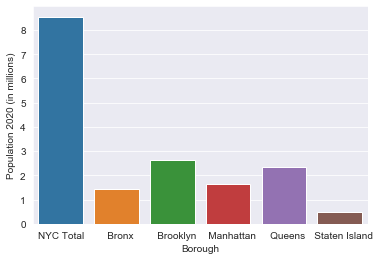

In [22]:
sns.set_style('darkgrid')
sns.barplot(x='Borough', y='Population 2020 (in millions)', data=pop_data2020)

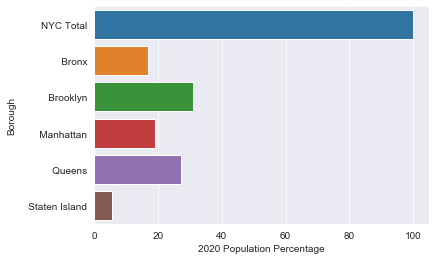

In [23]:
sns.set_style('darkgrid')
sns.barplot(x='2020 Population Percentage', y='Borough', data=pop_data2020, orient='h')

In [24]:
# Future Population Center (Potential Consumers)
sns.set_style('darkgrid')
sns.barplot(x='Borough', y='Population 2040 (in millions)', data=pop_data2040)

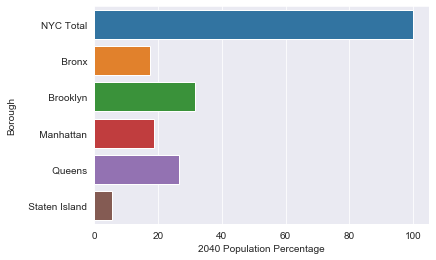

In [25]:
sns.set_style('darkgrid')
sns.barplot(x='2040 Population Percentage', y='Borough', data=pop_data2040, orient='h')

In [26]:
# Per Capita Income

In [27]:
Per_Capita_Income

Geographic  Area    2013    2014    2015    2016    2017
0                      Bronx   30647   31556   32778   33310   35564
1           Brooklyn (Kings)   39586   41399   43915   45629   48758
2                  Manhattan  145231  152690  155779  164056  175960
3                     Queens   39789   40997   43216   44031   46829
4  Staten Island  (Richmond)   46219   48123   50894   51836   54908

In [28]:
sns.barplot(x='Geographic  Area', y='2017', data=Per_Capita_Income)

In [29]:
Years = ['2013', '2014', '2015', '2016', '2017']

In [30]:
Per_Capita_Income.set_index(keys='Geographic  Area', drop = True, inplace=True)

In [31]:
Per_Capita_Income.index.name = None

In [32]:
PICT = Per_Capita_Income.T

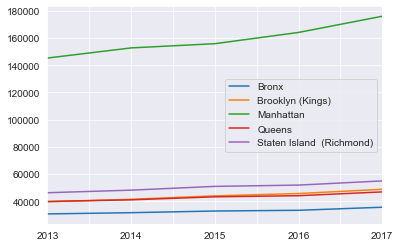

In [33]:
PICT.plot()

In [34]:
# DataFrame Consolidation.

In [35]:
Per_Capita_Income

2013    2014    2015    2016    2017
Bronx                       30647   31556   32778   33310   35564
Brooklyn (Kings)            39586   41399   43915   45629   48758
Manhattan                  145231  152690  155779  164056  175960
Queens                      39789   40997   43216   44031   46829
Staten Island  (Richmond)   46219   48123   50894   51836   54908

In [36]:
pop_data2020

Borough  Population 2020 (in millions)  2020 Population Percentage
0         NYC Total                       8.550971                      100.00
1             Bronx                       1.446788                       16.92
2          Brooklyn                       2.648452                       30.97
3         Manhattan                       1.638281                       19.16
4            Queens                       2.330295                       27.25
5     Staten Island                       0.487155                        5.70

In [37]:
pop_data2040

Borough  Population 2040 (in millions)  2040 Population Percentage
0         NYC Total                       9.025145                      100.00
1             Bronx                       1.579245                       17.50
2          Brooklyn                       2.840525                       31.47
3         Manhattan                       1.691617                       18.74
4            Queens                       2.412649                       26.73
5     Staten Island                       0.501109                        5.55

In [38]:
Boroughs = pop_data2020['Borough']
Boroughs

0           NYC Total
1               Bronx
2            Brooklyn
3           Manhattan
4              Queens
5       Staten Island
Name: Borough, dtype: object

In [39]:
pop_data2020.drop(index=0, inplace=True)
pop_data2040.drop(index=0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
Per_Capita_Income

2013    2014    2015    2016    2017
Bronx                       30647   31556   32778   33310   35564
Brooklyn (Kings)            39586   41399   43915   45629   48758
Manhattan                  145231  152690  155779  164056  175960
Queens                      39789   40997   43216   44031   46829
Staten Island  (Richmond)   46219   48123   50894   51836   54908

In [42]:
Per_Capita_Income.reset_index(drop=False, inplace=True)
Per_Capita_Income

index    2013    2014    2015    2016    2017
0                      Bronx   30647   31556   32778   33310   35564
1           Brooklyn (Kings)   39586   41399   43915   45629   48758
2                  Manhattan  145231  152690  155779  164056  175960
3                     Queens   39789   40997   43216   44031   46829
4  Staten Island  (Richmond)   46219   48123   50894   51836   54908

In [43]:
Per_Capita_Income.rename(columns={'index':'Borough', '2013':'PCI_2013 ($)','2014':'PCI_2014 ($)','2015':'PCI_2015 ($)','2016':'PCI_2016 ($)','2017':'PCI_2017 ($)'}, inplace=True)
Per_Capita_Income

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Borough PCI_2013 ($) PCI_2014 ($) PCI_2015 ($)  \
0                      Bronx        30647        31556        32778   
1           Brooklyn (Kings)        39586        41399        43915   
2                  Manhattan       145231       152690       155779   
3                     Queens        39789        40997        43216   
4  Staten Island  (Richmond)        46219        48123        50894   

  PCI_2016 ($) PCI_2017 ($)  
0        33310        35564  
1        45629        48758  
2       164056       175960  
3        44031        46829  
4        51836        54908

In [44]:
CDF = Per_Capita_Income.set_index('Borough').join(pop_data2020.set_index('Borough'))
CDF

PCI_2013 ($) PCI_2014 ($) PCI_2015 ($) PCI_2016 ($)  \
Borough                                                                         
Bronx                            30647        31556        32778        33310   
Brooklyn (Kings)                 39586        41399        43915        45629   
Manhattan                       145231       152690       155779       164056   
Queens                           39789        40997        43216        44031   
Staten Island  (Richmond)        46219        48123        50894        51836   

                          PCI_2017 ($)  Population 2020 (in millions)  \
Borough                                                                 
Bronx                            35564                            NaN   
Brooklyn (Kings)                 48758                            NaN   
Manhattan                       175960                            NaN   
Queens                           46829                            NaN   
Staten Island  (Richmond)        54908                            NaN   

                           2020 Population Percentage  
Borough                                                
Bronx                                             NaN  
Brooklyn (Kings)                                  NaN  
Manhattan                                         NaN  
Queens                                            NaN  
Staten Island  (Richmond)                         NaN

In [45]:
CDF = CDF.join(pop_data2040.set_index('Borough'))
CDF

PCI_2013 ($) PCI_2014 ($) PCI_2015 ($) PCI_2016 ($)  \
Borough                                                                         
Bronx                            30647        31556        32778        33310   
Brooklyn (Kings)                 39586        41399        43915        45629   
Manhattan                       145231       152690       155779       164056   
Queens                           39789        40997        43216        44031   
Staten Island  (Richmond)        46219        48123        50894        51836   

                          PCI_2017 ($)  Population 2020 (in millions)  \
Borough                                                                 
Bronx                            35564                            NaN   
Brooklyn (Kings)                 48758                            NaN   
Manhattan                       175960                            NaN   
Queens                           46829                            NaN   
Staten Island  (Richmond)        54908                            NaN   

                           2020 Population Percentage  \
Borough                                                 
Bronx                                             NaN   
Brooklyn (Kings)                                  NaN   
Manhattan                                         NaN   
Queens                                            NaN   
Staten Island  (Richmond)                         NaN   

                           Population 2040 (in millions)  \
Borough                                                    
Bronx                                                NaN   
Brooklyn (Kings)                                     NaN   
Manhattan                                            NaN   
Queens                                               NaN   
Staten Island  (Richmond)                            NaN   

                           2040 Population Percentage  
Borough                                                
Bronx                                             NaN  
Brooklyn (Kings)                                  NaN  
Manhattan                                         NaN  
Queens                                            NaN  
Staten Island  (Richmond)                         NaN

In [46]:
# Final Form DataFrame is as above named CDF

In [49]:
import requests
import json

In [50]:
CDF

PCI_2013 ($) PCI_2014 ($) PCI_2015 ($) PCI_2016 ($)  \
Borough                                                                         
Bronx                            30647        31556        32778        33310   
Brooklyn (Kings)                 39586        41399        43915        45629   
Manhattan                       145231       152690       155779       164056   
Queens                           39789        40997        43216        44031   
Staten Island  (Richmond)        46219        48123        50894        51836   

                          PCI_2017 ($)  Population 2020 (in millions)  \
Borough                                                                 
Bronx                            35564                            NaN   
Brooklyn (Kings)                 48758                            NaN   
Manhattan                       175960                            NaN   
Queens                           46829                            NaN   
Staten Island  (Richmond)        54908                            NaN   

                           2020 Population Percentage  \
Borough                                                 
Bronx                                             NaN   
Brooklyn (Kings)                                  NaN   
Manhattan                                         NaN   
Queens                                            NaN   
Staten Island  (Richmond)                         NaN   

                           Population 2040 (in millions)  \
Borough                                                    
Bronx                                                NaN   
Brooklyn (Kings)                                     NaN   
Manhattan                                            NaN   
Queens                                               NaN   
Staten Island  (Richmond)                            NaN   

                           2040 Population Percentage  
Borough                                                
Bronx                                             NaN  
Brooklyn (Kings)                                  NaN  
Manhattan                                         NaN  
Queens                                            NaN  
Staten Island  (Richmond)                         NaN

In [51]:
NIND = ['   Staten Island', '   Queens', '   Brooklyn', '   Manhattan', '   Bronx']
CDF = CDF.reindex(NIND)
CDF.rename(index={'   Staten Island':'Staten Island', '   Queens':'Queens', '   Brooklyn':'Brooklyn', '   Manhattan':'Manhattan', '   Bronx':'Bronx'}, inplace=True)

In [53]:
CDF

PCI_2013 ($) PCI_2014 ($) PCI_2015 ($) PCI_2016 ($)  \
Borough                                                             
Staten Island          NaN          NaN          NaN          NaN   
Queens                 NaN          NaN          NaN          NaN   
Brooklyn               NaN          NaN          NaN          NaN   
Manhattan              NaN          NaN          NaN          NaN   
Bronx                  NaN          NaN          NaN          NaN   

              PCI_2017 ($)  Population 2020 (in millions)  \
Borough                                                     
Staten Island          NaN                            NaN   
Queens                 NaN                            NaN   
Brooklyn               NaN                            NaN   
Manhattan              NaN                            NaN   
Bronx                  NaN                            NaN   

               2020 Population Percentage  Population 2040 (in millions)  \
Borough                                                                    
Staten Island                         NaN                            NaN   
Queens                                NaN                            NaN   
Brooklyn                              NaN                            NaN   
Manhattan                             NaN                            NaN   
Bronx                                 NaN                            NaN   

               2040 Population Percentage  
Borough                                    
Staten Island                         NaN  
Queens                                NaN  
Brooklyn                              NaN  
Manhattan                             NaN  
Bronx                                 NaN

In [54]:
CDF.reset_index(inplace=True)
CDF.rename(columns={'index':'Borough'},inplace=True)
CDF

Borough PCI_2013 ($) PCI_2014 ($) PCI_2015 ($) PCI_2016 ($)  \
0  Staten Island          NaN          NaN          NaN          NaN   
1         Queens          NaN          NaN          NaN          NaN   
2       Brooklyn          NaN          NaN          NaN          NaN   
3      Manhattan          NaN          NaN          NaN          NaN   
4          Bronx          NaN          NaN          NaN          NaN   

  PCI_2017 ($)  Population 2020 (in millions)  2020 Population Percentage  \
0          NaN                            NaN                         NaN   
1          NaN                            NaN                         NaN   
2          NaN                            NaN                         NaN   
3          NaN                            NaN                         NaN   
4          NaN                            NaN                         NaN   

   Population 2040 (in millions)  2040 Population Percentage  
0                            NaN                         NaN  
1                            NaN                         NaN  
2                            NaN                         NaN  
3                            NaN                         NaN  
4                            NaN                         NaN

In [55]:
# Per Capita Income Choropleth

NYdata = r'NYAreas.json' # geojson file
NY_map_PCI = folium.Map(location=[NYC_latitude, NYC_longitude], zoom_start=10, tiles='cartodbpositron') # generate map of New York City

# add tile layers to the map
tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(NY_map_PCI)


choropleth = folium.Choropleth(
    geo_data=NYdata,
    data=CDF,
    columns=['Borough', 'PCI_2017 ($)'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', 
    fill_opacity=0.3, 
    line_opacity=1,
    legend_name='Per Capita Income ($)',
    highlight=True,
    smooth_factor=0).add_to(NY_map_PCI)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

# create a layer control
folium.LayerControl().add_to(NY_map_PCI)

# display map
NY_map_PCI

In [56]:
# Population Density Choropleth

NY_map_PD = folium.Map(location=[NYC_latitude, NYC_longitude], zoom_start=10, tiles='cartodbpositron') # generate map of New York City

# add tile layers to the map
tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(NY_map_PD)


choropleth = folium.Choropleth(
    geo_data=NYdata,
    data=CDF,
    columns=['Borough', 'Population 2020 (in millions)'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', 
    fill_opacity=0.3, 
    line_opacity=1,
    legend_name='Population 2020 (in millions)',
    highlight=True,
    smooth_factor=0).add_to(NY_map_PD)

# add labels indicating the name of the community
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

# create a layer control
folium.LayerControl().add_to(NY_map_PD)

# display map
NY_map_PD

In [57]:
# Constructing Neighborhood DataFrame for New York City Boroughs

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [58]:
# Since all required data is available in 'features' key
newyork_data = newyork_data['features']

In [59]:
# Construct DataFrame from available JSON file data
columns = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
NY_BNLL = pd.DataFrame(columns=columns)
NY_BNLL

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [60]:
# Add Data to NY_BNLL DataFrame
for data in newyork_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY_BNLL = NY_BNLL.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [61]:
NY_BNLL.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [62]:
print('New York has {} Boroughs and {} Neighborhoods'.format(NY_BNLL['Borough'].nunique(), NY_BNLL['Neighborhood'].count()))

New York has 5 Boroughs and 306 Neighborhoods


In [63]:
# Map the Neighborhoods on the NYC Map

map_newyork_NHs = folium.Map(location=[NYC_latitude, NYC_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(NY_BNLL['Latitude'], NY_BNLL['Longitude'], NY_BNLL['Borough'], NY_BNLL['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork_NHs)  
    
map_newyork_NHs

In [64]:
# Segregating Manhattan data

MAN = NY_BNLL[NY_BNLL['Borough']=='Manhattan'].reset_index(drop=True)
MAN.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [65]:
print('Manhattan Latitude = {} & Manhattan Longitude {}'.format(Manhattan_latitude, Manhattan_longitude))

Manhattan Latitude = 40.7896239 & Manhattan Longitude -73.9598939


In [66]:
# Map the Manhattan Neighborhoods on the NYC Map

map_manhattan_NHs = folium.Map(location=[Manhattan_latitude, Manhattan_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(MAN['Latitude'], MAN['Longitude'], MAN['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_NHs)  
    
map_manhattan_NHs

In [67]:
# Use Foursquare API to explore venues in the neighborhood in a 100m radius.
# We need to get the venues in order to analyze the neighborhood that would be most suitable to open up a restuarant.

CLIENT_ID = 'CFTFRSXPWIJJZCWF35YEOCHQZHM20ET5NI4ZTJF4BD20A0VO' # your Foursquare ID
CLIENT_SECRET = '5MFWUABKAO1B3NDXSQ33NEMGVRLTQQEIIHLDIQUJ4K03TZ1G' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [68]:
def getMAN_Venues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [69]:
MAN_Venues = getMAN_Venues(names=MAN['Neighborhood'],
                                   latitudes=MAN['Latitude'],
                                   longitudes=MAN['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [70]:
MAN_Venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Marble Hill              40.876551              -73.910660   
1      Marble Hill              40.876551              -73.910660   
2      Marble Hill              40.876551              -73.910660   
3      Marble Hill              40.876551              -73.910660   
4      Marble Hill              40.876551              -73.910660   
...            ...                    ...                     ...   
3155  Hudson Yards              40.756658              -74.000111   
3156  Hudson Yards              40.756658              -74.000111   
3157  Hudson Yards              40.756658              -74.000111   
3158  Hudson Yards              40.756658              -74.000111   
3159  Hudson Yards              40.756658              -74.000111   

                        Venue  Venue Latitude  Venue Longitude  \
0                    Arturo's       40.874412       -73.910271   
1                 Bikram Yoga       40.876844       -73.906204   
2               Tibbett Diner       40.880404       -73.908937   
3                   Starbucks       40.877531       -73.905582   
4                     Dunkin'       40.877136       -73.906666   
...                       ...             ...              ...   
3155    Cachet Boutique Hotel       40.759773       -73.996460   
3156                 StarDust       40.759869       -73.996460   
3157                   Jake's       40.757954       -74.002296   
3158        NYPD Mounted Unit       40.759155       -74.004121   
3159  NY Waterway 42nd St Bus       40.760050       -74.003379   

           Venue Category  
0             Pizza Place  
1             Yoga Studio  
2                   Diner  
3             Coffee Shop  
4              Donut Shop  
...                   ...  
3155                Hotel  
3156            Nightclub  
3157  American Restaurant  
3158              Stables  
3159          Bus Station  

[3160 rows x 7 columns]

In [77]:
# Lets categorize the venues
print('There are {} unique venue categories in Manhattan.'.format(MAN_Venues['Venue Category'].nunique()))

There are 327 unique venue categories in Manhattan.


In [85]:
MAN_Venues.groupby('Neighborhood').count()['Venue Category'].plot('bar', figsize=(12,7))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


In [86]:
# Now we need to know which Neighborhoods have what sorts of Venue Categories.

In [88]:
MAN_VCs = pd.get_dummies(MAN_Venues[['Venue Category']], prefix="", prefix_sep="")
MAN_VCs['Neighborhood'] = MAN_Venues['Neighborhood']
Col_Order = [MAN_VCs.columns[-1]] + list(MAN_VCs.columns[:-1])
MAN_VCs = MAN_VCs[Col_Order]
MAN_VCs.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Marble Hill                  0               0                  0   
1  Marble Hill                  0               0                  0   
2  Marble Hill                  0               0                  0   
3  Marble Hill                  0               0                  0   
4  Marble Hill                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                   0                    0             0       0   
1                   0                    0             0       0   
2                   0                    0             0       0   
3                   0                    0             0       0   
4                   0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  ...  Video Store  \
0                 0                       0  ...            0   
1                 0                       0  ...            0   
2                 0                       0  ...            0   
3                 0                       0  ...            0   
4                 0                       0  ...            0   

   Vietnamese Restaurant  Volleyball Court  Waterfront  Whisky Bar  Wine Bar  \
0                      0                 0           0           0         0   
1                      0                 0           0           0         0   
2                      0                 0           0           0         0   
3                      0                 0           0           0         0   
4                      0                 0           0           0         0   

   Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0          0            0              0            0  
1          0            0              0            1  
2          0            0              0            0  
3          0            0              0            0  
4          0            0              0            0  

[5 rows x 328 columns]

In [90]:
MAN_VCs.shape

(3160, 328)

In [96]:
MAN_VCs_Grp = MAN_VCs.groupby('Neighborhood').mean().reset_index()

In [97]:
MAN_VCs_Grp

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0     Battery Park City           0.000000            0.00               0.00   
1         Carnegie Hill           0.000000            0.00               0.00   
2        Central Harlem           0.000000            0.00               0.00   
3               Chelsea           0.000000            0.00               0.00   
4             Chinatown           0.000000            0.00               0.00   
5          Civic Center           0.000000            0.00               0.00   
6               Clinton           0.000000            0.00               0.00   
7           East Harlem           0.000000            0.00               0.00   
8          East Village           0.000000            0.00               0.00   
9    Financial District           0.000000            0.00               0.00   
10             Flatiron           0.000000            0.00               0.00   
11             Gramercy           0.000000            0.00               0.00   
12    Greenwich Village           0.000000            0.00               0.00   
13     Hamilton Heights           0.000000            0.00               0.00   
14         Hudson Yards           0.000000            0.00               0.00   
15               Inwood           0.000000            0.00               0.00   
16           Lenox Hill           0.000000            0.00               0.01   
17       Lincoln Square           0.000000            0.00               0.00   
18         Little Italy           0.000000            0.00               0.00   
19      Lower East Side           0.000000            0.00               0.00   
20     Manhattan Valley           0.000000            0.00               0.00   
21       Manhattanville           0.000000            0.00               0.00   
22          Marble Hill           0.000000            0.00               0.00   
23              Midtown           0.000000            0.00               0.00   
24        Midtown South           0.000000            0.00               0.00   
25  Morningside Heights           0.000000            0.00               0.00   
26          Murray Hill           0.000000            0.00               0.00   
27                 Noho           0.000000            0.00               0.00   
28     Roosevelt Island           0.000000            0.00               0.00   
29                 Soho           0.000000            0.00               0.00   
30      Stuyvesant Town           0.000000            0.00               0.00   
31         Sutton Place           0.000000            0.01               0.00   
32              Tribeca           0.000000            0.00               0.00   
33           Tudor City           0.000000            0.00               0.00   
34           Turtle Bay           0.000000            0.00               0.00   
35      Upper East Side           0.000000            0.00               0.00   
36      Upper West Side           0.000000            0.00               0.00   
37   Washington Heights           0.011628            0.00               0.00   
38         West Village           0.000000            0.00               0.00   
39            Yorkville           0.000000            0.00               0.00   

    African Restaurant  American Restaurant  Antique Shop    Arcade  \
0             0.000000             0.015873          0.00  0.000000   
1             0.000000             0.011494          0.00  0.000000   
2             0.058824             0.039216          0.00  0.000000   
3             0.000000             0.040000          0.00  0.000000   
4             0.000000             0.030000          0.00  0.000000   
5             0.000000             0.030000          0.01  0.000000   
6             0.000000             0.040000          0.00  0.000000   
7             0.000000             0.000000          0.00  0.000000   
8             0.000000             0.010000       

In [103]:
Top_Venues = 5

for NH in MAN_VCs_Grp['Neighborhood']:
    print("----"+NH+"----")
    Temp = MAN_VCs_Grp[MAN_VCs_Grp['Neighborhood'] == NH].T.reset_index()
    Temp.columns = ['Venue','Frequency']
    Temp = Temp.iloc[1:]
    Temp['Frequency'] = Temp['Frequency'].astype(float)
    Temp = Temp.round({'Frequency': 2})
    print(Temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(Top_Venues))
    print('\n')

----Battery Park City----
           Venue  Frequency
0           Park       0.11
1          Hotel       0.08
2    Coffee Shop       0.06
3            Gym       0.05
4  Memorial Site       0.05


----Carnegie Hill----
                Venue  Frequency
0         Coffee Shop       0.09
1  Italian Restaurant       0.05
2                Café       0.05
3         Yoga Studio       0.03
4                 Gym       0.03


----Central Harlem----
                  Venue  Frequency
0    African Restaurant       0.06
1           Art Gallery       0.04
2     French Restaurant       0.04
3   American Restaurant       0.04
4  Gym / Fitness Center       0.04


----Chelsea----
                 Venue  Frequency
0          Coffee Shop       0.08
1          Art Gallery       0.07
2       Ice Cream Shop       0.04
3  American Restaurant       0.04
4    French Restaurant       0.03


----Chinatown----
                Venue  Frequency
0  Chinese Restaurant       0.08
1              Bakery       0.06
2       

In [160]:
# Create columns for the DataFrame containing the most common Venue Categories in Manhattan Neighborhood
Top_Venues_10 = 10
Suffs = ['st', 'nd', 'rd']

Top_Venues_Cols = ['Neighborhood']
for ind in np.arange(Top_Venues_10):
    try:
        Top_Venues_Cols.append('{}{} Most Common Venue'.format(ind+1, Suffs[ind]))
    except:
        Top_Venues_Cols.append('{}th Most Common Venue'.format(ind+1))
Top_Venues_Cols

['Neighborhood',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

In [161]:
# Function to Sort and get the Top 10 Venues of each Neighborhood
def Top_Venues(Venues, Top_Venues_10):
    Venue_Cats = Venues.iloc[1:]
    Venue_Cats_sorted = Venue_Cats.sort_values(ascending=False)
    
    return Venue_Cats_sorted.index.values[0:Top_Venues_10]

In [162]:
# Create a new dataframe with the Most Common Venues in each Neighborhood.
Top_NH_Venues = pd.DataFrame(columns=Top_Venues_Cols)
Top_NH_Venues['Neighborhood'] = MAN_VCs_Grp['Neighborhood']

for k in np.arange(MAN_VCs_Grp.shape[0]):
    Top_NH_Venues.iloc[k, 1:] = Top_Venues(MAN_VCs_Grp.iloc[k,:], Top_Venues_10)

Top_NH_Venues.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                  Park                 Hotel   
1      Carnegie Hill           Coffee Shop    Italian Restaurant   
2     Central Harlem    African Restaurant    Seafood Restaurant   
3            Chelsea           Coffee Shop           Art Gallery   
4          Chinatown    Chinese Restaurant                Bakery   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop         Memorial Site                   Gym   
1                  Café           Yoga Studio  Gym / Fitness Center   
2                   Bar    Chinese Restaurant   American Restaurant   
3   American Restaurant        Ice Cream Shop                  Café   
4          Dessert Shop     Hotpot Restaurant                   Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Mexican Restaurant        Sandwich Place         Shopping Mall   
1             Wine Shop                   Gym             Bookstore   
2           Pizza Place     French Restaurant  Gym / Fitness Center   
3    Italian Restaurant     French Restaurant          Cycle Studio   
4                   Spa          Optical Shop   American Restaurant   

   9th Most Common Venue 10th Most Common Venue  
0                  Plaza             Food Court  
1                 Bakery          Grocery Store  
2            Art Gallery   Caribbean Restaurant  
3           Cupcake Shop            Pizza Place  
4  Vietnamese Restaurant           Cocktail Bar

Now we have all the Venues data for the Neighborhoods. We can Cluster the Neighborhoods and check which Neighborhoods pose a better investment opportunity for opening up a Restuarant.

As the Question we are trying to answer is an Unsupervised Learning Problem, for this purpose we will use the k Means Clustering Algorithm.

In [163]:
from sklearn.cluster import KMeans

In [164]:
# We set the Cluster Number to 5 as we dont want to many Centroids for classification for location based on Nearby Venues.
KClusters = 5

MAN_VCs_Grp_Cluster = MAN_VCs_Grp.drop('Neighborhood', 1)

# Rnn K-Means Clustering
kmeans = KMeans(n_clusters=KClusters, random_state=0).fit(MAN_VCs_Grp_Cluster)

In [165]:
# Check Cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 1, 4, 1, 4, 0, 1, 4, 1, 1, 1, 1, 1, 4, 0, 4, 1, 0, 4, 4, 4, 4,
       2, 1, 4, 4, 1, 1, 3, 1, 3, 1, 0, 4, 0, 1, 1, 4, 0, 1])

In [166]:
# Add Cluster Labels
Top_NH_Venues.insert(0, 'Cluster Labels', kmeans.labels_)

MAN_Merged = MAN

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
MAN_Merged = MAN_Merged.join(Top_NH_Venues.set_index('Neighborhood'), on='Neighborhood')

MAN_Merged.head() # check the last columns!

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               2   
1  Manhattan           Chinatown  40.715618 -73.994279               4   
2  Manhattan  Washington Heights  40.851903 -73.936900               4   
3  Manhattan              Inwood  40.867684 -73.921210               4   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Sandwich Place                   Gym           Coffee Shop   
1    Chinese Restaurant                Bakery          Dessert Shop   
2                  Café                Bakery     Mobile Phone Shop   
3    Mexican Restaurant                  Café                Lounge   
4           Pizza Place         Deli / Bodega           Coffee Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Yoga Studio      Department Store        Tennis Stadium   
1     Hotpot Restaurant                   Bar                   Spa   
2    Chinese Restaurant                  Park           Supermarket   
3            Restaurant           Pizza Place                  Park   
4                  Café    Mexican Restaurant                School   

  7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
0       Supplement Shop            Donut Shop             Kids Store   
1          Optical Shop   American Restaurant  Vietnamese Restaurant   
2            Donut Shop    Spanish Restaurant       Tapas Restaurant   
3                Bakery    Chinese Restaurant   Caribbean Restaurant   
4      Sushi Restaurant          Cocktail Bar         Sandwich Place   

      10th Most Common Venue  
0             Discount Store  
1               Cocktail Bar  
2  Latin American Restaurant  
3              Deli / Bodega  
4                     Bakery

In [288]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[Manhattan_latitude, Manhattan_longitude], zoom_start=11, tiles='cartodbpositron')

# set color scheme for the clusters
x = np.arange(KClusters)
ys = [i + x + (i*x)**2 for i in range(KClusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MAN_Merged['Latitude'], MAN_Merged['Longitude'], MAN_Merged['Neighborhood'], MAN_Merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The Neighborhoods are grouped in to clusters based on similarities in the venue categories. The depicted neighborhoods on the map can be converted in to Dataframes for further decision making

In [253]:
# Cluster 0 DataFrame
Cluster0 = MAN_Merged.loc[MAN_Merged['Cluster Labels'] == 0, MAN_Merged.columns[[1] + list(range(5, MAN_Merged.shape[1]))]].reset_index(drop=True)
Cluster0

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Lincoln Square                 Plaza  Gym / Fitness Center   
1         Tribeca   American Restaurant                  Park   
2    West Village    Italian Restaurant              Wine Bar   
3    Civic Center           Coffee Shop  Gym / Fitness Center   
4      Turtle Bay    Italian Restaurant           Coffee Shop   
5    Hudson Yards                 Hotel    Italian Restaurant   

  3rd Most Common Venue    4th Most Common Venue  5th Most Common Venue  \
0                  Café             Concert Hall  Performing Arts Venue   
1    Italian Restaurant                     Café               Wine Bar   
2   American Restaurant  New American Restaurant           Cocktail Bar   
3                 Hotel                     Park           Cocktail Bar   
4      Sushi Restaurant            Deli / Bodega                   Park   
5   American Restaurant     Gym / Fitness Center                   Park   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0               Theater             Wine Shop   Indie Movie Theater   
1                   Spa      Greek Restaurant           Coffee Shop   
2                  Park           Pizza Place           Coffee Shop   
3     French Restaurant           Yoga Studio                  Café   
4                  Café     French Restaurant    Seafood Restaurant   
5                  Café               Dog Run                   Bar   

  9th Most Common Venue 10th Most Common Venue  
0   American Restaurant            Coffee Shop  
1            Skate Park                  Hotel  
2                Bakery           Gourmet Shop  
3                   Spa    American Restaurant  
4    Turkish Restaurant                  Plaza  
5                   Gym        Thai Restaurant

In [254]:
# Cluster 1 DataFrame
Cluster1 = MAN_Merged.loc[MAN_Merged['Cluster Labels'] == 1, MAN_Merged.columns[[1] + list(range(5, MAN_Merged.shape[1]))]].reset_index(drop=True)
Cluster1

Neighborhood 1st Most Common Venue     2nd Most Common Venue  \
0      Upper East Side    Italian Restaurant               Coffee Shop   
1            Yorkville    Italian Restaurant                       Gym   
2           Lenox Hill    Italian Restaurant               Coffee Shop   
3      Upper West Side    Italian Restaurant                  Wine Bar   
4              Clinton               Theater      Gym / Fitness Center   
5              Midtown           Coffee Shop                     Hotel   
6          Murray Hill        Sandwich Place               Coffee Shop   
7              Chelsea           Coffee Shop               Art Gallery   
8    Greenwich Village    Italian Restaurant          Sushi Restaurant   
9         East Village                   Bar               Pizza Place   
10                Soho    Italian Restaurant            Clothing Store   
11            Gramercy                   Bar               Coffee Shop   
12  Financial District           Coffee Shop       American Restaurant   
13       Carnegie Hill           Coffee Shop        Italian Restaurant   
14                Noho    Italian Restaurant               Pizza Place   
15        Sutton Place           Coffee Shop      Gym / Fitness Center   
16            Flatiron  Gym / Fitness Center  Mediterranean Restaurant   

      3rd Most Common Venue 4th Most Common Venue  \
0                    Bakery             Juice Bar   
1               Coffee Shop                   Bar   
2               Pizza Place                  Café   
3         Indian Restaurant                Bakery   
4        Italian Restaurant           Coffee Shop   
5            Sandwich Place        Clothing Store   
6                     Hotel   Japanese Restaurant   
7       American Restaurant        Ice Cream Shop   
8                      Café        Clothing Store   
9              Cocktail Bar    Mexican Restaurant   
10              Coffee Shop         Women's Store   
11       Italian Restaurant           Pizza Place   
12              Pizza Place        Sandwich Place   
13                     Café           Yoga Studio   
14              Coffee Shop              Wine Bar   
15       Italian Restaurant                  Park   
16  New American Restaurant           Coffee Shop   

            5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                     Yoga Studio                   Spa             Wine Shop   
1                     Pizza Place      Sushi Restaurant         Deli / Bodega   
2                Sushi Restaurant          Cocktail Bar  Gym / Fitness Center   
3                             Bar           Coffee Shop            Sports Bar   
4                       Wine Shop        Sandwich Place   American Restaurant   
5                          Bakery               Theater           Pizza Place   
6            Gym / Fitness Center           Pizza Place      Cuban Restaurant   
7                            Café    Italian Restaurant     French Restaurant   
8                     Coffee Shop        Ice Cream Shop     Indian Restaurant   
9                  Ice Cream Shop           Coffee Shop     Korean Restaurant   
10                 Sandwich Place     French Restaurant                Bakery   
11                     Bagel Shop            Playground    Mexican Restaurant   
12                   Cocktail Bar                   Bar                 Hotel   
13           Gym / Fitness Center             Wine Shop                   Gym   
14                  Grocery Store   American Restaurant          Cocktail Bar   
15            American Restaurant            Bagel Shop                   Gym   
16  Vegetarian / Vegan Restaurant                  Park             Wine Shop   

       8th Most Common Venue 9th Most Common Venue    10th Most Common Venue  
0       Gym / Fitness Center     French Restaurant          Sushi Restaurant  
1                      Diner    Mexican Restaurant       Japanese Restaurant  
2                        G

In [255]:
# Cluster 2 DataFrame
Cluster2 = MAN_Merged.loc[MAN_Merged['Cluster Labels'] == 2, MAN_Merged.columns[[1] + list(range(5, MAN_Merged.shape[1]))]].reset_index(drop=True)
Cluster2

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Marble Hill        Sandwich Place                   Gym   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop           Yoga Studio      Department Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Tennis Stadium       Supplement Shop            Donut Shop   

  9th Most Common Venue 10th Most Common Venue  
0            Kids Store         Discount Store

In [256]:
# Cluster 3 DataFrame
Cluster3 = MAN_Merged.loc[MAN_Merged['Cluster Labels'] == 3, MAN_Merged.columns[[1] + list(range(5, MAN_Merged.shape[1]))]].reset_index(drop=True)
Cluster3

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Roosevelt Island                  Park            Playground   
1  Battery Park City                  Park                 Hotel   
2    Stuyvesant Town                  Park         Boat or Ferry   

                      3rd Most Common Venue 4th Most Common Venue  \
0  Residential Building (Apartment / Condo)           Coffee Shop   
1                               Coffee Shop         Memorial Site   
2                                       Bar              Heliport   

  5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
0      Greek Restaurant  Outdoors & Recreation                   Gym   
1                   Gym     Mexican Restaurant        Sandwich Place   
2        Baseball Field            Gas Station          Cocktail Bar   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0  Gym / Fitness Center        Sandwich Place            Supermarket  
1         Shopping Mall                 Plaza             Food Court  
2           Coffee Shop  Gym / Fitness Center        Harbor / Marina

In [257]:
# Cluster 4 DataFrame
Cluster4 = MAN_Merged.loc[MAN_Merged['Cluster Labels'] == 4, MAN_Merged.columns[[1] + list(range(5, MAN_Merged.shape[1]))]].reset_index(drop=True)
Cluster4

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0             Chinatown    Chinese Restaurant                Bakery   
1    Washington Heights                  Café                Bakery   
2                Inwood    Mexican Restaurant                  Café   
3      Hamilton Heights           Pizza Place         Deli / Bodega   
4        Manhattanville           Coffee Shop    Seafood Restaurant   
5        Central Harlem    African Restaurant    Seafood Restaurant   
6           East Harlem    Mexican Restaurant                Bakery   
7       Lower East Side                  Café    Chinese Restaurant   
8          Little Italy                Bakery    Chinese Restaurant   
9      Manhattan Valley    Mexican Restaurant                   Bar   
10  Morningside Heights             Bookstore   American Restaurant   
11        Midtown South     Korean Restaurant                 Hotel   
12           Tudor City                  Park                  Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Dessert Shop     Hotpot Restaurant                   Bar   
1      Mobile Phone Shop    Chinese Restaurant                  Park   
2                 Lounge            Restaurant           Pizza Place   
3            Coffee Shop                  Café    Mexican Restaurant   
4       Sushi Restaurant    Mexican Restaurant         Deli / Bodega   
5                    Bar    Chinese Restaurant   American Restaurant   
6        Thai Restaurant         Deli / Bodega        Sandwich Place   
7            Art Gallery           Coffee Shop          Cocktail Bar   
8                    Spa       Bubble Tea Shop    Italian Restaurant   
9            Coffee Shop           Yoga Studio           Pizza Place   
10                  Park           Coffee Shop         Deli / Bodega   
11          Dessert Shop   Japanese Restaurant  Gym / Fitness Center   
12    Mexican Restaurant         Deli / Bodega                   Gym   

   6th Most Common Venue 7th Most Common Venue     8th Most Common Venue  \
0                    Spa          Optical Shop       American Restaurant   
1            Supermarket            Donut Shop        Spanish Restaurant   
2                   Park                Bakery        Chinese Restaurant   
3                 School      Sushi Restaurant              Cocktail Bar   
4     Italian Restaurant        Scenic Lookout                      Bank   
5            Pizza Place     French Restaurant      Gym / Fitness Center   
6            Pizza Place                   Spa               Gas Station   
7                 Bakery      Ramen Restaurant               Yoga Studio   
8         Sandwich Place       Thai Restaurant  Mediterranean Restaurant   
9      Indian Restaurant    Chinese Restaurant           Bubble Tea Shop   
10          Burger Joint        Sandwich Place        Mexican Restaurant   
11                  Café          Burger Joint               Coffee Shop   
12       Thai Restaurant    Seafood Restaurant                    Garden   

       9th Most Common Venue     10th Most Common Venue  
0      Vietnamese Restaurant               Cocktail Bar  
1           Tapas Restaurant  Latin American Restaurant  
2       Caribbean Restaurant              Deli / Bodega  
3             Sandwich Place                     Bakery  
4                        Bar              Grocery Store  
5                Art Gallery       Caribbean Restaurant  
6                   Beer Bar                   Pharmacy  
7   Mediterranean Restaurant                   Pet Café  
8             Ice Cream Shop               Cocktail Bar  
9             Clothing Store             Farmers Market  
10   New American Restaurant                 Food Truck  
11                    Lounge             Cosmetics Shop  
12               Coffee Shop           Greek Restaurant

In [265]:
# Count the number of Cafes & Restuarants in each cluster neighborhoods

C0_Count = 0
for n in Top_Venues_Cols[1:]:
    j = 0
    while (j < Cluster0.index.shape[0]):
        C = Cluster0[n][j]
        j = j + 1
        if ((C.lower().find('cafe') != -1) | (C.lower().find('restaurant') != -1) | (C.lower().find('café') != -1)):
            C0_Count += 1
C0_Count

C1_Count = 0
for n in Top_Venues_Cols[1:]:
    j = 0
    while (j < Cluster1.index.shape[0]):
        C = Cluster1[n][j]
        j = j + 1
        if ((C.lower().find('cafe') != -1) | (C.lower().find('restaurant') != -1) | (C.lower().find('café') != -1)):
            C1_Count += 1
C1_Count

C2_Count = 0
for n in Top_Venues_Cols[1:]:
    j = 0
    while (j < Cluster2.index.shape[0]):
        C = Cluster2[n][j]
        j = j + 1
        if ((C.lower().find('cafe') != -1) | (C.lower().find('restaurant') != -1) | (C.lower().find('café') != -1)):
            C2_Count += 1
C2_Count

C3_Count = 0
for n in Top_Venues_Cols[1:]:
    j = 0
    while (j < Cluster3.index.shape[0]):
        C = Cluster3[n][j]
        j = j + 1
        if ((C.lower().find('cafe') != -1) | (C.lower().find('restaurant') != -1) | (C.lower().find('café') != -1)):
            C3_Count += 1
C3_Count

C4_Count = 0
for n in Top_Venues_Cols[1:]:
    j = 0
    while (j < Cluster4.index.shape[0]):
        C = Cluster4[n][j]
        j = j + 1
        if ((C.lower().find('cafe') != -1) | (C.lower().find('restaurant') != -1) | (C.lower().find('café') != -1)):
            C4_Count += 1
C4_Count

print('The number of Cafes\Restuarants in Cluster 0 = ', C0_Count)
print('The number of Cafes\Restuarants in Cluster 1 = ', C1_Count)
print('The number of Cafes\Restuarants in Cluster 2 = ', C2_Count)
print('The number of Cafes\Restuarants in Cluster 3 = ', C3_Count)
print('The number of Cafes\Restuarants in Cluster 4 = ', C4_Count)

The number of Cafes\Restuarants in Cluster 0 =  22
The number of Cafes\Restuarants in Cluster 1 =  55
The number of Cafes\Restuarants in Cluster 2 =  0
The number of Cafes\Restuarants in Cluster 3 =  2
The number of Cafes\Restuarants in Cluster 4 =  52


In [289]:
# Number of neighborhoods in clusters
Num_Cluster0 = Cluster0.index.shape[0]
Num_Cluster1 = Cluster1.index.shape[0]
Num_Cluster2 = Cluster2.index.shape[0]
Num_Cluster3 = Cluster3.index.shape[0]
Num_Cluster4 = Cluster4.index.shape[0]

print('The Number of Neighborhoods in Cluster 0 is', Num_Cluster0)
print('The Number of Neighborhoods in Cluster 1 is', Num_Cluster1)
print('The Number of Neighborhoods in Cluster 2 is', Num_Cluster2)
print('The Number of Neighborhoods in Cluster 3 is', Num_Cluster3)
print('The Number of Neighborhoods in Cluster 4 is', Num_Cluster4)

The Number of Neighborhoods in Cluster 0 is 6
The Number of Neighborhoods in Cluster 1 is 17
The Number of Neighborhoods in Cluster 2 is 1
The Number of Neighborhoods in Cluster 3 is 3
The Number of Neighborhoods in Cluster 4 is 13


In [274]:
# Lets calculate the proportion of Top 10 Venues which are Cafes\Restuarants
C_Prop_Cluster0 = round((C0_Count/(Cluster0.index.shape[0] * 10))*100, 2)
C_Prop_Cluster1 = round((C1_Count/(Cluster1.index.shape[0] * 10))*100, 2)
C_Prop_Cluster2 = round((C2_Count/(Cluster2.index.shape[0] * 10))*100, 2)
C_Prop_Cluster3 = round((C3_Count/(Cluster3.index.shape[0] * 10))*100, 2)
C_Prop_Cluster4 = round((C4_Count/(Cluster4.index.shape[0] * 10))*100, 2)

print('The proportion of Cafes\Restaurants in the Top Venues of Cluster 0 is', C_Prop_Cluster0, '%')
print('The proportion of Cafes\Restaurants in the Top Venues of Cluster 1 is', C_Prop_Cluster1, '%')
print('The proportion of Cafes\Restaurants in the Top Venues of Cluster 2 is', C_Prop_Cluster2, '%')
print('The proportion of Cafes\Restaurants in the Top Venues of Cluster 3 is', C_Prop_Cluster3, '%')
print('The proportion of Cafes\Restaurants in the Top Venues of Cluster 4 is', C_Prop_Cluster4, '%')

The proportion of Cafes\Restaurants in the Top Venues of Cluster 0 is 36.67 %
The proportion of Cafes\Restaurants in the Top Venues of Cluster 1 is 32.35 %
The proportion of Cafes\Restaurants in the Top Venues of Cluster 2 is 0.0 %
The proportion of Cafes\Restaurants in the Top Venues of Cluster 3 is 6.67 %
The proportion of Cafes\Restaurants in the Top Venues of Cluster 4 is 40.0 %


In [283]:
Prop_Cluster = [C_Prop_Cluster0, C_Prop_Cluster1, C_Prop_Cluster2, C_Prop_Cluster3, C_Prop_Cluster4]
Prop_Cluster_Ind = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
Gt = pd.DataFrame(data=Prop_Cluster, index=Prop_Cluster_Ind).reset_index(drop=False).rename(columns={'index':'Clusters', 0:'Cafe\Restaurant Proportion'})
Gt['Neighborhoods in Cluster'] = [Cluster0.index.shape[0], Cluster1.index.shape[0], Cluster2.index.shape[0], Cluster3.index.shape[0], Cluster4.index.shape[0]]
Gt

Clusters  Cafe\Restaurant Proportion  Neighborhoods in Cluster
0  Cluster0                       36.67                         6
1  Cluster1                       32.35                        17
2  Cluster2                        0.00                         1
3  Cluster3                        6.67                         3
4  Cluster4                       40.00                        13

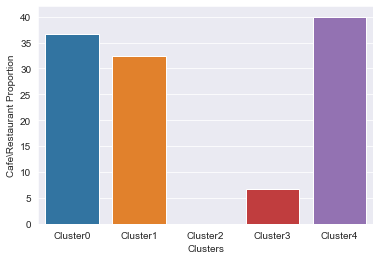

In [282]:
sns.barplot(x='Clusters', y='Cafe\Restaurant Proportion', data=Gt)

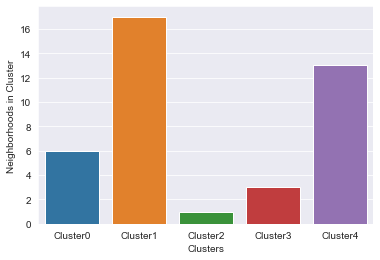

In [285]:
sns.barplot(x='Clusters', y='Neighborhoods in Cluster', data=Gt)

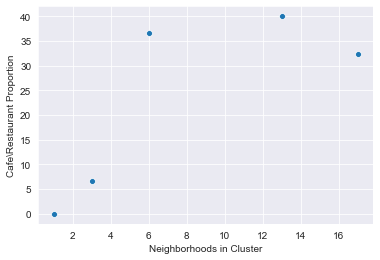

In [287]:
sns.scatterplot(x='Neighborhoods in Cluster', y='Cafe\Restaurant Proportion', data=Gt)

we have finalized to suggest to our investor to go for an investment in Cluster 1 mainly because of two reasons. The number of neighborhoods in the cluster is the highest which suggests a larger area and bigger number of consumers. Secondly, the proportion being lower than the highest proportion of 40% suggests that there is room for competition. A new restaurant will surely find its space in one of the neighborhoods of Cluster 1.